In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc

# Extraction
Use **pandas** to extract data from a CSV file

In [291]:
df = pd.read_csv("dataset/heart.csv")

## Optional
Use pandas methods to extract **specific data** from the dataset based on criteria.

In [292]:
# Extract data for patients with age greater than 50
age_filter = df.loc[df['age'] > 50]

---

# Exploratory Data Analysis (EDA)
Perform initial data exploration to understand the structure and characteristics of the dataset.

In [293]:
# Check the dimensions of the dataset
df.shape

(303, 14)

In [294]:
# Display a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [295]:
# Display the first few rows of the dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [296]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [297]:
# Generate descriptive statistics of the dataset
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


---

# Transformation & Analysis

## Optional 1 - Age Category Column

Creating the 'age_category' column is important to simplify the analysis by categorizing individuals into age groups. This allows for easier comparisons, reveals age-related patterns, and enhances interpretability.

In [298]:
# Create a new column 'age_category' based on age
df['age_category'] = df['age'].apply(lambda x: 'Senior' if x > 60 else 'Adult')

# Show the sum of the count of each category in the 'age_category' column
age_category_counts = df['age_category'].value_counts()
print(age_category_counts)


Adult     224
Senior     79
Name: age_category, dtype: int64


There are **224 individuals** categorized as **'Adult'** and **79 individuals** categorized as **'Senior'**.

### Data Visualization

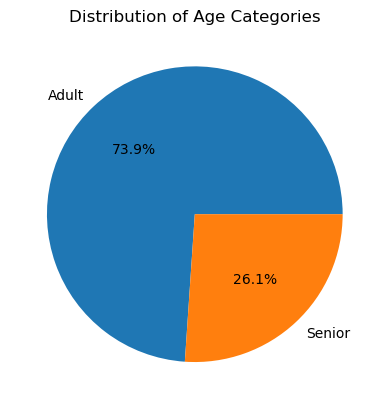

In [299]:
age_category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Remove y-axis label
plt.title('Distribution of Age Categories')

plt.show()


## Optional 2 - Risk Group Category Column

The transformation to create the **'risk_group' column** based on **cholesterol levels** is important as it allows for risk stratification and simplifies the interpretation of cholesterol-related risks. By categorizing cholesterol levels into **'Low'**, **'Moderate'**, and **'High'** risk groups, it enables easier comparisons, aligns with clinical relevance, and facilitates meaningful analysis of cholesterol-related health outcomes.

In [300]:
# Create a new column 'risk_group' based on cholesterol levels
conditions = [
    (df['chol'] < 200),
    (df['chol'] >= 200) & (df['chol'] < 240),
    (df['chol'] >= 240)
]
choices = ['Low', 'Moderate', 'High']
df['risk_group'] = np.select(conditions, choices)

risk_group_counts = df['risk_group'].value_counts()
print(risk_group_counts)

High        155
Moderate     98
Low          50
Name: risk_group, dtype: int64


### Data Visualization

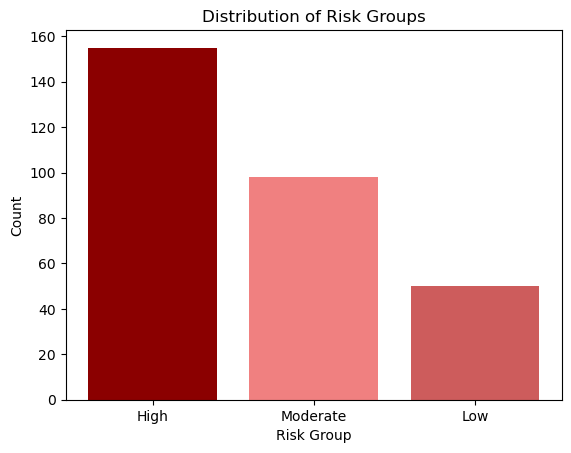

In [301]:
risk_groups = risk_group_counts.index
counts = risk_group_counts.values

colors = ['darkred', 'lightcoral', 'indianred']

plt.bar(risk_groups, counts, color=colors)
plt.xlabel('Risk Group')
plt.ylabel('Count')
plt.title('Distribution of Risk Groups')

plt.show()


There are **155 individuals** in the **'High' risk group**, **98 individuals** in the **'Moderate' risk group**, and **50 individuals** in the **'Low' risk group**.

## Optional 3 - Muti Risk Factors Category Column

**High cholesterol** and **high blood pressure** are significant **risk factors for heart attacks**. They contribute to the formation of artery-clogging plaque, leading to atherosclerosis and an increased likelihood of a heart attack. However, it's essential to recognize that heart attacks are influenced by multiple factors, and **high cholesterol and high blood pressure are not the only determinants**.

In [302]:
# Use a for-loop to create a new column 'heart_disease_risk'
df['heart_disease_risk'] = ''
for index, row in df.iterrows():
    if row['chol'] > 200 and row['trtbps'] > 140:
        df.at[index, 'heart_disease_risk'] = 'High'
    else:
        df.at[index, 'heart_disease_risk'] = 'Low'

# Show the sum of the count of each category in the 'heart_disease_risk' column
heart_disease_risk_counts = df['heart_disease_risk'].value_counts()
print(heart_disease_risk_counts)

Low     247
High     56
Name: heart_disease_risk, dtype: int64


### Data Visualization

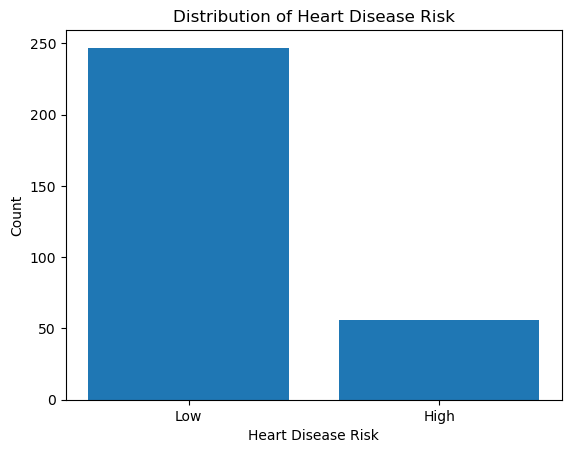

In [303]:
plt.bar(heart_disease_risk_counts.index, heart_disease_risk_counts.values)
plt.xlabel('Heart Disease Risk')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Risk')
plt.show()


There are **247 individuals** categorized as having a **low risk** of heart disease based on the conditions of **cholesterol levels and blood pressure**, while **56 individuals** are categorized as having a **high risk**.

In [304]:
correlation = df['heart_disease_risk'].astype('category').cat.codes.corr(df['output'])
print("Correlation between heart_disease_risk and output:", correlation)

Correlation between heart_disease_risk and output: 0.12796556801850512


The correlation between the 'heart_disease_risk' column and the 'output' column in the dataset (303, 14) is 0.128. This positive correlation indicates a weak relationship between the assigned risk categories and the likelihood of a heart attack. 

However, it's important to interpret this correlation with caution, considering the relatively small dataset size. The correlation estimates in smaller datasets can be more susceptible to random variation and may not fully capture the true underlying relationships.

---